In [1]:
import matplotlib as mpl

#for an angle we import Pi
from math import pi

# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer


#Inorder to get exact visulization of Quntum circuit execution, results, etc
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector



<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\Y}{ \mymatrix{rr}{0 & -i \\ i & 0} } $ $ \newcommand{\S}{ \mymatrix{rr}{1 & 0 \\ 0 & i} } $ 
$ \newcommand{\T}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{i \frac{pi}{4}}} } $ 
$ \newcommand{\Sdg}{ \mymatrix{rr}{1 & 0 \\ 0 & -i} } $ 
$ \newcommand{\Tdg}{ \mymatrix{rr}{1 & 0 \\ 0 & e^{-i \frac{pi}{4}}} } $

# What quantum mechanics is there in quantum computing that I must remember?

1. The wave function ψ to denote an electron (or qubit) lives in Hilbert Space.


2. The act of measuring ψ collapses the quantum state to classical state.


3. In quantum computing everything is spoken in terms of probability.Since the system is probabilistic, one measurement is not enough to say anything with certainty.

# <h1><center><span style="color: red;">$\textbf{Classical Computing vs Quantum computing }$</center></h1>



In classical computers, information is represented as the binary digits 0 or 1. These are called bits.In fact, every classical computer translates these bits into the human readable information on your electronic device.The word document you read or video you watch is encoded in the computer binary language in terms of these 1’s and 0’s.

 $\textbf{Quantum bits}$, called qubits, are similar to bits in that there are two measurable states called
the 0 and 1 states. However, unlike classical bits, qubits can also be in a superposition state of these 0 and 1 states.

In [2]:
#Anharmonic Oscillator (Joshephen Junction)
from IPython.display import Image
Image(url= "R.png", width=400, height=200)

# <h1><center><span style="color: red;">$\textbf{Qubit Representation in Vector Space }$</center></h1>


The state of a qubit is enclosed in the right half of an angled bracket,called the “ket”. A qubit |$\psi$>, could be in a |0> or |1> state which is a superposition of both |0> and |1>. The general state of a qubit ($|q\rangle$) is:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$
where  $\alpha$ and $\beta$ are called the amplitudes of the states.
Amplitudes are very important because they tell us the probability of finding the particle in that
specific state when performing a measurement. The probability of measuring the particle in state
|0> is $\alpha^2$, and the probability of measuring the particle in state |1> is $\beta^2$. The matrix representation of qubits are 

\begin{equation}|0\rangle=\left[\begin{array}{l}
1 \\
0
\end{array}\right] \quad|1\rangle=\left[\begin{array}{l}
0 \\
1
\end{array}\right]\end{equation}
 

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:

$$
|\psi\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Finally, since the qubit state must be normalised, i.e.

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

we can use the trigonometric identity:

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

$$
|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$ 

<h1> Bloch sphere </h1>

The state of a qubit $\ket{\psi} = \cos{\frac{\theta}{2}} \ket{0} + e^{i\phi} \sin{\frac{\theta}{2}} \ket{1}$ by separatly drawing angles $\frac{\theta}{2}$ and $\phi$. Bloch sphere geometrically represents the state of a qubit with both angles giving a vector from the center of a unit sphere (sphere with radius equal to one unit) to the surface of the sphere. Two angles precisely determine the point, at which the vector is pointing. The only exception is when $\ket{\psi} = \ket{0}$ or $\ket{\psi} = \ket{1}$ - in that case for any angle $\phi$ it will be the same point on the surface. Note that we don't take into account the global phase. To summarize:
<ul>
    <li>Bloch sphere as a geometrical object covers all possible states of a single qubit (upto global phase);</li>
    <li>Each point on the surface of the Bloch sphere represents state of a qubit.</li>
</ul>

Here we can see how the Bloch sphere looks like:

<img src="Images/bloch_sphere.png" width="40%">

### The Bloch sphere as 3D object has three axes. States on the opposite ends of each axis are orthogonal (in fact, any two states on the opposite sides of a Bloch sphere are orthogonal.
- On the poles of the z-axis there are states $\ket{0}$ and $\ket{1}$. 

- The angle $\theta$ shows how far the state is from state $\ket{0}$. 

- The angle $\phi$ shows the local phase, that is how much the state is "rotated" around z-axis. 

- Poles of the x-axis represent the states $\frac{1}{\sqrt{2}} (\ket{0} + \ket{1})$ and $\frac{1}{\sqrt{2}} (\ket{0} - \ket{1})$ and they differ by a local phase of $\phi = \pi$.

- Poles of the y-axis represent the states $\frac{1}{\sqrt{2}} (\ket{0} + i\ket{1})$ and $\frac{1}{\sqrt{2}} (\ket{0} - i\ket{1})$ and they differ by a local phase of $\phi = \pi$.. 

Install qiskit textbook using following command:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

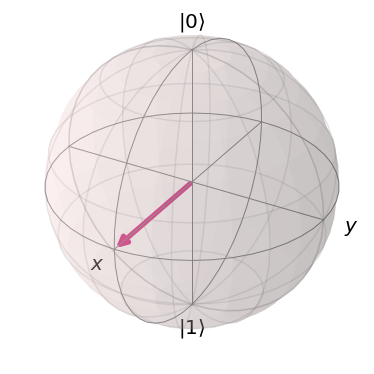

In [29]:
from math import pi
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [-pi/2,pi,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords)

# <h1><center><span style="color: red;">$\textbf{Single Qubit Gates}$</center></h1>


In [4]:
Image(url= "Quantum_Logic_Gates 1.png", width=600, height=400)

qc.x(0)    # rotation by Pi around the x-axis

qc.y(0)    # rotation by Pi around the y-axis

qc.z(0)    # rotation by Pi around the z-axis

qc.s(0)    # rotation by Pi/2 around the z-axis

qc.sdg(0)  # rotation by -Pi/2 around the z-axis

qc.h(0)    # rotation by Pi around an axis located halfway between x and z

 ### <h1><center><span style="color: blue;"> $\textbf{1.Pauli X-gate}$</center></h1>

The $\mathrm{X}$ gate has the matrix
$$
\sigma_{x}=\left[\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right]
$$
and this is the Pauli X matrix, named after Wolfgang Pauli.
It has the property that
    
$$
\sigma_{x}|0\rangle=|1\rangle \quad \text { and } \quad \sigma_{x}|1\rangle=|0\rangle
$$

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$
    
The Pauli-X gate is a single qubit operation gate that is similar to the classical not gate. It takes a value and flips it to the opposite one. It maps |0＞ to |1＞ and |1＞ to |0＞.

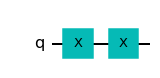

In [37]:
qcx = QuantumCircuit(1)#Visual representation using matplotlib
qcx.x(0)
qcx.x(0)
qcx.draw('mpl')

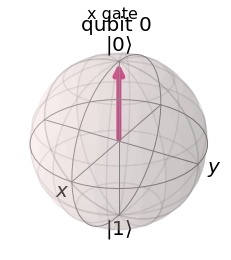

In [38]:
state = Statevector.from_instruction(qcx)
plot_bloch_multivector(state, title="x gate", reverse_bits=False)

In [40]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qcx,backend).result().get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

####  <h1><center><span style="color: blue;"> $\textbf{2.Pauli Y-gate}$</center></h1>

<font size ='4' >The Y gate has the matrix
$$
\sigma_{y}=\left[\begin{array}{cc}
0 & -i \\
i & 0
\end{array}\right]=i\left[\begin{array}{cc}
0 & -1 \\
1 & 0
\end{array}\right]
$$

and this is the Pauli Y matrix. 
The Pauli-Y gate is a single qubit operation. It maps |0＞ to -i|1＞ and |1＞ to -i|0＞. It equates to a rotation around the Y-axis of the Bloch sphere by pi radians.


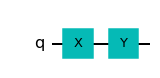

In [42]:
qcy = QuantumCircuit(1)
qcy.x(0)
qcy.y(0)
qcy.draw('mpl')

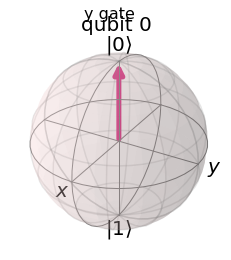

In [43]:
state = Statevector.from_instruction(qcy)
plot_bloch_multivector(state, title="y gate ", reverse_bits=False)

In [44]:
final_state = execute(qcy,backend).result().get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>


<h1><center><span style="color: blue;"> $\textbf{3.Pauli Z-gate}$</center></h1>

<font size ='4' >The Z gate has the matrix
$$
\sigma_{z}=\left[\begin{array}{cc}
1 & 0 \\
0 & -1
\end{array}\right]
$$


and this is the Pauli Z matrix. It rotates qubit states by $\pi$ around the $z$ axis on the Bloch sphere.
 The Pauli-Z gate is a single qubit operation. It maps |1＞ to -|1＞ and it leaves |0＞ unchanged. It equates to a rotation around the Z-axis of the Bloch sphere by pi radians.

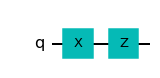

In [52]:
rajkumar = QuantumCircuit(1)
rajkumar.x(0)
rajkumar.z(0)
rajkumar.draw('mpl')

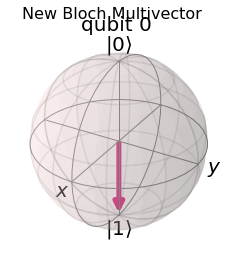

In [53]:
state = Statevector.from_instruction(rajkumar)
plot_bloch_multivector(state, title="New Bloch Multivector", reverse_bits=False)

In [54]:
final_state = execute(rajkumar,backend).result().get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>


<h1><center><span style="color: blue;"> $\textbf{4.The Hadamard Gate}$</center></h1>

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

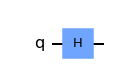

In [15]:
qch = QuantumCircuit(1)
qch.h(0)
qch.draw('mpl')

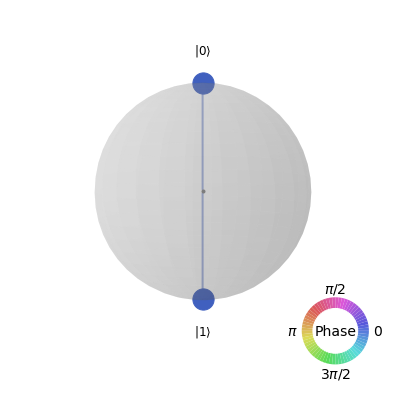

In [16]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

state = Statevector.from_instruction(qch)
plot_state_qsphere(state)

 We have the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$ which is termed as ket plus state  as $$
\begin{array}{l}
H|0\rangle=|+\rangle
\end{array}
$$

<font size ='4' >This time, the bottom circle, corresponding to the basis state $\vert1\rangle$ has a different color corresponding to the phase of $\phi = \pi$. This is because the coefficient of $\vert1\rangle$ in the state $$\frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)$$ is $-1$, which is equal to $e^{i\pi}$. The given state is termed as ket minus as $$
\begin{array}{l}
H|1\rangle=|-\rangle
\end{array}
$$

<h1><center><span style="color: blue;"> $\textbf{5. P Gate}$</center></h1>

The P-gate (phase gate) is parametrised, that is, it needs a number ($\phi$) to tell it exactly what to do. The P-gate performs a rotation of ϕ around the Z-axis direction. It has the matrix form:

$$ P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{{i\phi}} \end{bmatrix}$$


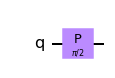

In [17]:
qcp = QuantumCircuit(1)
qcp.p(pi/2, 0)
qcp.draw("mpl")

You may notice that the Z-gate is a special case of the P-gate, with  $\phi$  = $\pi$
 .

<h1><center><span style="color: blue;"> $\textbf{5. S or P Gate}$</center></h1>

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate), this is a P-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  The S<sup>†</sup>-gate is clearly an P-gate with $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

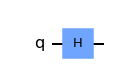

In [18]:
qcp = QuantumCircuit(1)
qcp.h(0)
# qcp.s(0)
qcp.draw('mpl')

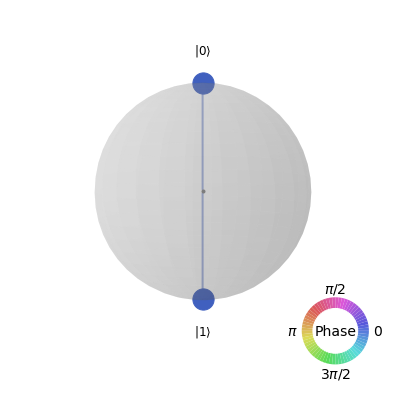

In [19]:
state = Statevector.from_instruction(qcp)
plot_state_qsphere(state)

<h1><center><span style="color: blue;"> $\textbf{6. T-gate}$</center></h1>

## The T-gate is a very commonly used gate, it is an P-gate with  ϕ=π/4 

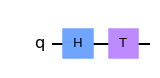

In [20]:
qct = QuantumCircuit(1)
qct.h(0)
qct.t(0)
qct.draw('mpl')

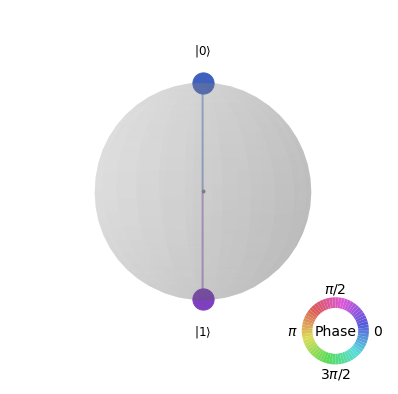

In [21]:
state = Statevector.from_instruction(qct)
plot_state_qsphere(state)

In [22]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [23]:
import qiskit.tools.jupyter
%qiskit_version_table

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
